# Entropy and CO$_2$ Sequestration (Processes With Ideal Gases)

Peter Godart ([ptgodart@mit.edu](mailto:ptgodart@mit.edu))

**Goals**:
  * Define constitutive relationships for change in entropy of ideal gas as functions of changes in gas temperature, pressure, and volume
  * Explore the entropy change as a result of mixing two gases and compute minimum energy required for separating them
  * Define the Second Law of Thermodynamics and show how to combine with First Law to relate change in entropy to work ($W$) and heat transfer ($Q$)
  * Compute the thermodynamic minimum work for separating annual anthropogenic CO$_2$ emissions

## Change in Entropy of an Ideal Gas Undergoing a Thermodynamic Process

As we will see here, it is often useful to compute the change in entropy for an ideal gas undergoing some change of state (i.e. thermodynamic process). For example, the gas temperature, pressure, volume, or some combination of those properties may change between states, and being able to compute the associated change in entropy to use in conjunction with the Second Law of Thermodynamics gives us more information to solve problems. In this Jupyter Notebook, we will explore these laws to set a lower bound on the work required to sequester carbon dioxide (CO$_2$) from the atmosphere.

First, we broadly define an *ideal gas* here to be one whose pressure, temperature, and volume are related by the following ideal gas law:

$$Pv = RT\tag{1}$$

where $v$ is the specific volume of the gas in our control volume (m$^3$/mol) and $R$ is the ideal gas constant, typically given as 8.314 J/mol-K. There are many assumptions that are required for this relationship to hold, but we will ignore those for now. Many inert gases at temperatures and pressures far below their critical point are reasonably modeled by Eq. 1.

Assuming we have an ideal gas, the change in entropy between two states (State 1 @ $P_1$, $V_1$, and $T_1$ and State 2 @ $P_2$, $V_2$, and $T_2$) can take one of the following forms:

\begin{align}
  \Delta s &= s_2 - s_1 \\
           &= c_v\, ln\left(\frac{T_2}{T_1}\right) + R\, ln\left(\frac{v_2}{v_1}\right) \tag{2}\\
           &= c_p\, ln\left(\frac{T_2}{T_1}\right) - R\, ln\left(\frac{P_2}{P_1}\right) \tag{3}\\
           &= c_p\, ln\left(\frac{V_2}{V_1}\right) + c_v\, ln\left(\frac{P_2}{P_1}\right) \tag{4}
\end{align}

where $c_v$ and $c_p$ are the species-specific heat capacity at constant volume and pressure respectively and $R$ is the ideal gas constant. Note for ideal gases,

$$c_p = c_v + R\tag{5}$$

The units of entropy, noted above with lower-case $s$ are J/mol-K. Which form of the above constitutive relationship we use depends on what variables are specified or easily computed.

Here you will implement and use these equations to answer the following:

### Problem 1:

Compute the change in entropy for carbon dioxide (CO$_2$) undergoing the following thermodynamic processes:

1.   An expansion that brings the gas temperature from 600 to 400 K with an accompanying pressure drop from 10 to 1 bar.
2.   A compression that brings the gas from a specific volume of 4 to 2 m$^3$/mol with an accompanying temperature rise of 300 to 700 K.
3.   Isobaric heat transfer at 1 bar raising the gas temperature from 600 to 900 K.

For each of these, we will assume CO$_2$ is an ideal gas and that $c_v$ is constant (i.e. not a function of temperature).

Print all answers below.

In [1]:
from numpy import log

# Constants
c_v_CO2 = 28.91 # J/mol-K @ 300.15 K and 1 bar
R = 8.314 # J/mol-K

# Insert code here:

c_p_CO2 = c_v_CO2 + R

# Part 1 (temperature and pressure changing):
T_1_1 = 600 # K
T_2_1 = 400 # K
P_1_1 = 10e5 # Pa
P_2_1 = 1e5 # Pa
delta_s_1 = c_p_CO2*log(T_2_1/T_1_1) - R*log(P_2_1/P_1_1)
print(f'delta_s_1 = {delta_s_1:0.3g} J/mol-K')

# Part 2 (specific volume and temperature changing):
T_1_2 = 300 # K
T_2_2 = 700 # K
v_1_2 = 4 # m3/mol
v_2_2 = 2 # m3/mol
delta_s_2 = c_v_CO2*log(T_2_2/T_1_2) + R*log(v_2_2/v_1_2)
print(f'delta_s_2 = {delta_s_2:0.3g} J/mol-K')

# Part 3 (specific volume and temperature changing):
T_1_3 = 600 # K
T_2_3 = 900 # K
v_1_3 = R*T_1_3/101325 # m3/mol
v_2_3 = R*T_2_3/101325 # m3/mol
delta_s_3 = c_v_CO2*log(T_2_3/T_1_3) + R*log(v_2_3/v_1_3)
print(f'delta_s_1 = {delta_s_3:0.3g} J/mol-K')

delta_s_1 = 4.05 J/mol-K
delta_s_2 = 18.7 J/mol-K
delta_s_1 = 15.1 J/mol-K


## Entropy of Ideal Gas Mixing

With this knowledge of how the entropy of an ideal gas changes over different processes, we are now capable of analyzing the change in entropy that results from the mixing of two ideal gases, which will be relevant to our discussion about CO$_2$ sequestration later in this Notebook. First, let's assume we have two ideal gases, A and B, which are initially separated in an enclosed volume by a membrane. The membrane is removed at time $t = 0$ and the gases are allowed to mix, ultimately forming another ideal Gas A+B after the system has come to thermal equilibrium. We will assume the gases do not interact with one another in any way (i.e. no chemical reactions, forces, etc.):

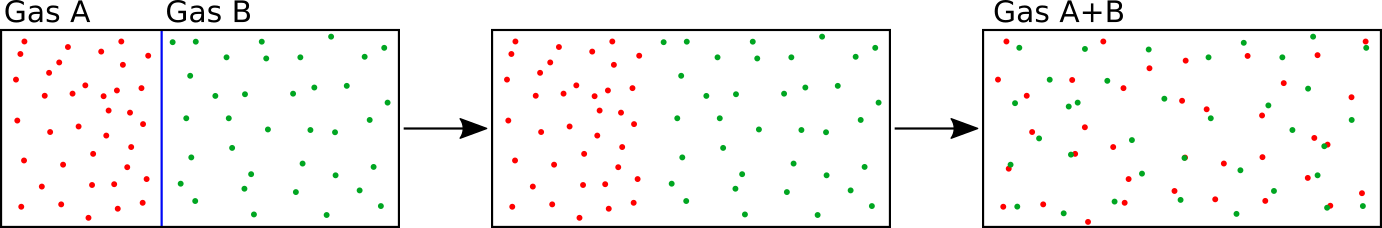

Since the two gases do not interact, we can break this problem up into two parts, the expansion of Gas A and the expansion of Gas B and sum their changes in entropy to find the total entropy of mixing:

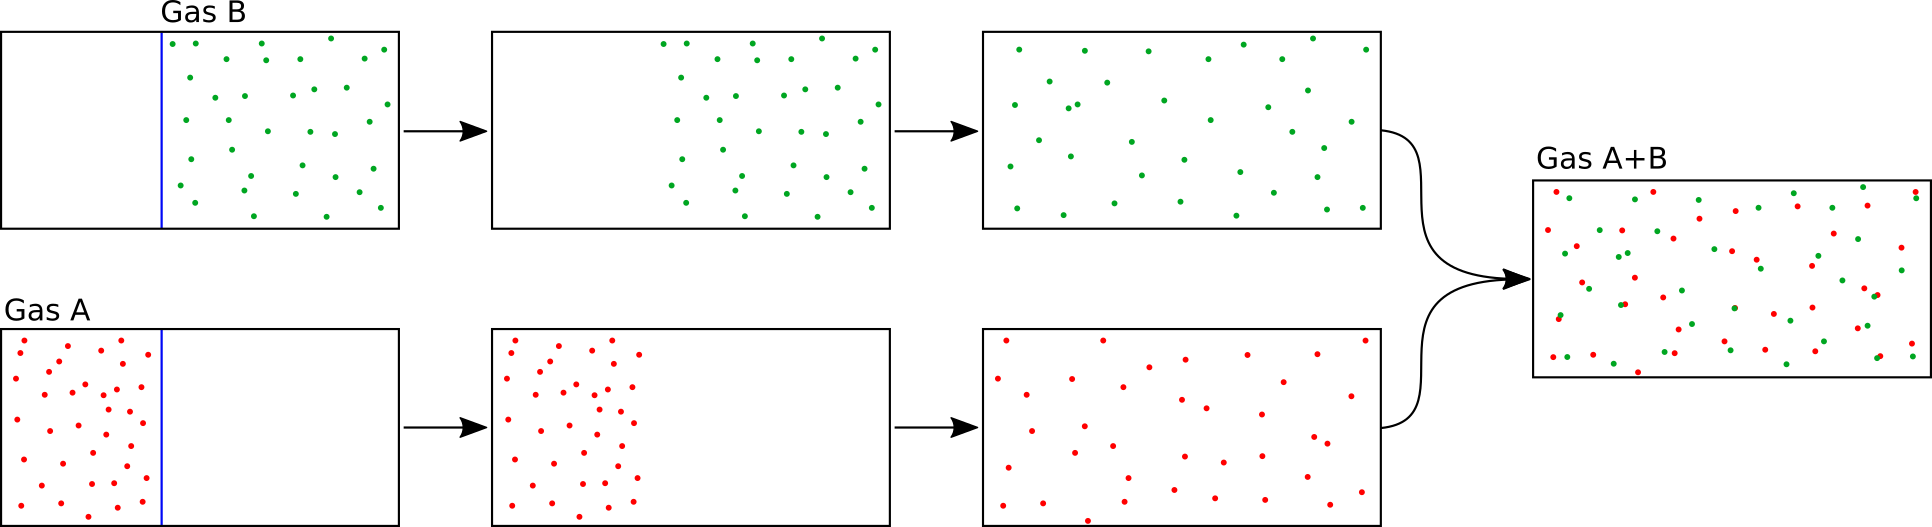

For the sake of simplicity, we will assume that the gases are always in  equilibrium with the environment, which is fixed at temperature $T_0$ and pressure $P_0$. Also, it is helpful to define the molar mass of one of the gases as the mole fraction, $X$, of the total mass (i.e. $X_A = n_A/n_{total}$). So to summarize our different state variables and givens:

**State 1**:
  * Gas A is at $P_{A,1}$, $T_{A,1}$, and $V_{A,1}$
  * Gas B is at $P_{B,1}$, $T_{B,1}$, and $V_{B,1}$

**State 2**:
  * Gas A is at $P_{A,2}$, $T_{A,2}$, and $V_{A,2}$
  * Gas B is at $P_{B,2}$, $T_{B,2}$, and $V_{B,2}$

**Other givens**:
  * $P_{A,1} = P_{B,1} = P_{A,2} + P_{B,2} = P_0$
  * $T_{A,1} = T_{B,1} = T_{A,2} = T_{B,2} = T_0$

### Problem 2:

Compute the change in entropy for both Gas A and Gas B as they undergo this mixing process. Assume $T_0 = 300.15$ K, $P_0 = 101325$ Pa, and $X_A = 0.5$. What is is total change in entropy for this mixing process? Print all answers below.

In [2]:
# Constants
c_v_CO2 = 28.91 # J/mol-K @ 300.15 K and 1 bar
c_v_air = 20.79 # J/mol-K @ 300.15 K and 1 bar
R = 8.314 # J/mol-K

# Given
T_0 = 300.15 # K
P_0 = 101325 # Pa
X_A = 0.5

# Insert code here:

def entropy_of_mixing(c_v_A, c_v_B, X_A, P_0, T_0):
  # Compute specific volume of mixture
  v_mix = R * T_0 / P_0 # m^3/mol
  # Change in entropy for Gas A:
  v_A_1 = v_mix
  v_A_2 = R * T_0 / (X_A * P_0)
  delta_s_A = c_v_A*log(T_0/T_0) + R*log(v_A_2/v_A_1)
  # Change in entropy for Gas B:
  v_B_1 = v_mix
  v_B_2 = R * T_0 / ((1 - X_A) * P_0)
  delta_s_B = c_v_B*log(T_0/T_0) + R*log(v_B_2/v_B_1)
  # Total change in entropy is weighted sum of delta_s_A and delta_s_B
  return(X_A * delta_s_A + (1 - X_A) * delta_s_B)

delta_s_mixing = entropy_of_mixing(c_v_CO2, c_v_air, X_A, P_0, T_0)
print(f'delta_s_mixing = {delta_s_mixing:0.3g} J/mol-K')

delta_s_mixing = 5.76 J/mol-K


### Problem 3:

CO$_2$ and air are allowed to mix isothermally and isobarically at 300.15 K and 1 bar. For this mixing process, plot the following curves:

1.   Total change in entropy per unit mass of the **total gas (CO$_2$ + air)** as a function of $X_A$ from 0 to 1.
2.   Total change in entropy per unit mass of **CO$_2$** as a function of $X_{CO_2}$ from 0 to 1.

Plot curves below.

*Note: to avoid divide-by-zero warnings, plot from 0.001 to 0.999.*

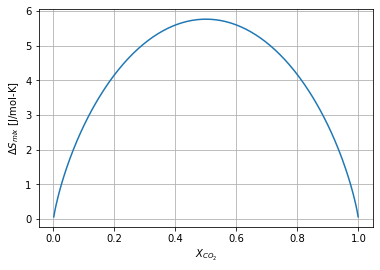

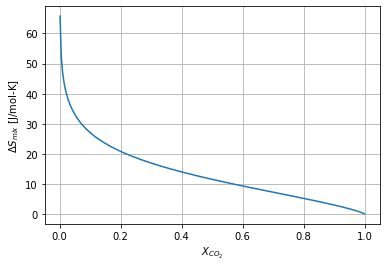

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Constants
c_v_CO2 = 28.91 # J/mol-K @ 300.15 K and 1 bar
c_v_air = 20.79 # J/mol-K @ 300.15 K and 1 bar
R = 8.314 # J/mol-K

# Given
T_0 = 300.15 # K
P_0 = 101325 # Pa
X_A = np.linspace(0.001, 0.999, 250)

# Insert code below:

# Plot per mole of total gas
plt.plot(X_A, [entropy_of_mixing(c_v_CO2, c_v_air, X, P_0, T_0) for X in X_A])
plt.xlabel('$X_{CO_2}$')
plt.ylabel('$\Delta S_{mix}$ [J/mol-K]')
plt.grid()
plt.show()

# Plot per mole of CO2
plt.plot(X_A, [entropy_of_mixing(c_v_CO2, c_v_air, X, P_0, T_0)/X for X in X_A])
plt.xlabel('$X_{CO_2}$')
plt.ylabel('$\Delta S_{mix}$ [J/mol-K]')
plt.grid()
plt.show()

## Minimum Work of Separation and CO$_2$ Sequestration

At this point we are now capable of computing the change in entropy of a gas (or gases) undergoing various thermodynamic and mixing processes. Why is this useful though? We will show here that the work required to separate two gases is related to the entropy change each gas underwent, and there are many practical implications of gas separation. An important example we will look at is the sequestration of CO$_2$. Anthropogenic climate change has been largely driven by the emission of CO$_2$ and other greenhouse gases into the atmosphere, causing more solar thermal energy to be trapped by atmosphere, warming the average temperature of the Earth's surface. One possible strategy to mitigating this issue is simply recapturing all of the CO$_2$ emitted since the industrial revolution (or as much as we can). It is important then to understand how much energy this would require.

Using the First and Second Laws of Thermodyanmics together, we can find an expression for $W$ in terms of the change in entropy that results from the mixing of two gases:

First Law:

$$\Delta U = Q - W$$

Second Law:

$$\Delta S_{sep} = \sum_i \frac{Q_i}{T_i} + \Delta S_{gen}$$

Where $$\Delta S_{sep} = -\Delta S_{mix}$$.For a single net heat transfer $Q$ at temperature $T$, we can combine these two laws, first rearranging the Second Law to solve for $Q$ and then plugging that into the First Law:

$$Q = T\cdot[-\Delta S_{mix} - \Delta S_{gen}]$$

$$\Rightarrow \Delta U = T\cdot[-\Delta S_{mix} - \Delta S_{gen}] - W$$

Rearranging again for isothermal process using a perfect gas (i.e. $\Delta U = 0$), giving us:

$$\Rightarrow W = T\cdot[-\Delta S_{mix} - \Delta S_{gen}]$$

Keep in mind that the external work done on the system to perform the separation is defined here to be negative, so the $\Delta S_{gen}$ term actually contributes to the absolute value of amount of work that must be done. Thus, the *minimum work* is achieved by doing this process reversibly such that $\Delta S_{gen} = 0$.

For our separation problem, that is

$$\boxed{W_{min} = -T \Delta S_{mix}}$$

which intuitively is equivalent to the amount of work done by the system as it underwent the mixing process to begin with. Note that $\Delta S_{mix}$ is positive for our previous mixing example, and thus $W_{min}$ is negative, meaning that by our sign conventions, external work must be done on the system to separate the gases.

### Problem 4:

Like Problem 3, we are interested in looking at separating CO$_2$ from air. For these gases, plot the following curves:

1.   Absolute value of minimum work of separation per unit mass of the **total gas (CO$_2$ + air)** as a function of $X_{CO_2}$ from 0 to 1.
2.   Absolute value of minimum work of separation per unit mass of **CO$_2$** as a function of $X_{CO_2}$ from 0 to 1.

Plot curves below.

*Note: to avoid divide-by-zero warnings, plot from 0.001 to 0.999.*

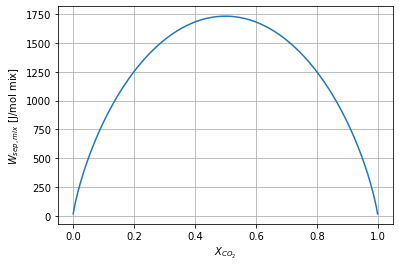

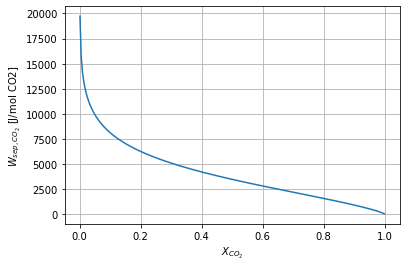

In [4]:
# Given
T_0 = 300.15 # K
P_0 = 101325 # Pa
X_A = np.linspace(0.001, 0.999, 250)

# Insert code below:

# Plot per mole of total gas
plt.plot(X_A, [T_0*entropy_of_mixing(c_v_CO2, c_v_air, X, P_0, T_0) for X in X_A])
plt.xlabel('$X_{CO_2}$')
plt.ylabel('$W_{sep, mix}$ [J/mol mix]')
plt.grid()
plt.show()

# Plot per mole of CO2
plt.plot(X_A, [T_0*entropy_of_mixing(c_v_CO2, c_v_air, X, P_0, T_0)/X for X in X_A])
plt.xlabel('$X_{CO_2}$')
plt.ylabel('$W_{sep, CO_2}$ [J/mol CO2]')
plt.grid()
plt.show()

### Problem 5:

What is the minimum work required to separate the amount of CO$_2$ emitted annually by humans? Assume the following:

*   The concentration of CO$_2$ in the atmosphere ($X_{CO_2}$) is 412 ppm (412 mol CO$_2$/mol air)
*   Humans emit ~43 Gt CO$_2$ equivalent per year

Compare this value to the global annual electricity consumption of 25,000 TWh and comment on how accurate you think our estimate for the mininum work is. Print answers below.


In [5]:
# Insert code here:

M_CO2 = 44.01e-3 # kg/mol
X_CO2 = 0.04e-2 # ~412 ppm in atmosphere
P_sep = 101325 # Pa
T_sep = 300 # K
m_CO2_per_year = 43e9 * 1000 # kg (https://www.statista.com/statistics/276629/global-co2-emissions/)
n_CO2_per_year = m_CO2_per_year / M_CO2 # mol
W_sep = T_sep * entropy_of_mixing(c_v_CO2, c_v_air, X_CO2, P_sep, T_sep) / X_CO2 * n_CO2_per_year # J

print(f'{W_sep*1e-12/3600:0.3g} TWh')

5.97e+03 TWh


Compared to the annual global electricity consumption of [~25,000 TWh](https://www.iea.org/fuels-and-technologies/electricity), 6,000 TWh (25%) is significant but not impossible. This is certainly a gross underestimate, however. This assumes ideal capture conditions and that the electricity used to power this process is carbon neutral as well. This analysis also does not take into account what you do with the CO$_2$ once you capture it. Compressing the gas requires even more work that is not accounted for here.

## Bonus: Species Independence of $\Delta S_{mix}$

We can derive an equivalent expression for entropy of mixing and work of separation in terms of $X$ using some algebraic manipulation:

$$\Delta S_{mix} = \Delta S_A + \Delta S_B$$

where

$$\Delta S_A = n_A c_{v, A} ln \frac{T_0}{T_{A, 1}} + n_A R ln\frac{v_{A, 2}}{v_{A, 1}}$$

and

$$\Delta S_B = n_B c_{v, B} ln \frac{T_0}{T_{B, 1}} + n_B R ln\frac{v_{B, 2}}{v_{B, 1}}$$

For simplicity, we will again assume this mixing happens at constant temperature and constant temperature, and thus:

$$\Delta S_{mix} = R \left[n_A ln\frac{v_{A, 2}}{v_{A, 1}} + n_B ln\frac{v_{B, 2}}{v_{B, 1}}\right]$$

To simplify things further, we can use the molar fraction of gas A, i.e.

$$X_A = \frac{n_A}{n_A + n_B} = \frac{n_A}{n_{mix}}$$

and thus

$$\Delta S_{mix} = n_{mix} R \left[X_A ln \frac{v_{A, 2}}{v_{A, 1}} + (1-X_A) ln\frac{v_{B, 2}}{v_{B, 1}}\right]$$

By the ideal gas law:

$$v_{A, 1} = \frac{R T_{A, 1}}{P_{A, 1}}$$

$$v_{B, 1} = \frac{R T_{B, 1}}{P_{B, 1}}$$

and thus if $T_{A, 1}=T_{B, 1}=T_0$ and $P_{A, 1}=P_{B, 1}=P_0$:

$$v_{mix} = v_{A, 1} = v_{B, 1} = \frac{RT_0}{P_0}$$

and 

$$\frac{v_{A, 2}}{v_{A, 1}} = \frac{1}{X_A}$$

$$\frac{v_{B, 2}}{v_{B, 1}} = \frac{1}{(1 - X_A)}$$

Simplifying everything, we get:

$$\Delta S_{mix} = -n R \left[X_AlnX_A + (1-X_A)ln(1-X_A)\right]$$

or in general

$$\boxed{\Delta S_{mix} = -n R \sum_i X_i ln X_i}$$

and

$$\boxed{W_{min} = -n R T \sum_i X_i ln X_i}$$
